<a href="https://colab.research.google.com/github/AnusuiyaBhorkar/Effects-of-data-amount-and-variation-in-deep-learning-based-TB-diagnosis-in-chest-X-ray-scans/blob/main/Step_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix # new
import seaborn as sns # new

In [ ]:
# RG - recently added
def get_tf_data(data_path, batch_size, image_size, seed, split_ratio): # remember to keep the same seed and split_ratio as how each model was trained
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_path,
        color_mode="grayscale",
        label_mode="binary",
        batch_size=batch_size,
        image_size=(image_size[0], image_size[1]),
        shuffle=True,
        seed=seed,
        validation_split=split_ratio,
        subset="training"
    ) # train_ds still has to be initialised

    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_path,
        color_mode="grayscale",
        label_mode="binary",
        batch_size=batch_size,
        image_size=(image_size[0], image_size[1]),
        shuffle=True,
        seed=seed,
        validation_split=split_ratio,
        subset="validation"
    )
    return val_ds #train_ds doesn't need to be returned as it will not be used

**Testing on Dataset A (Montgomery)**

In [ ]:
data_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/data/MontgomerySet'
batch_size = 8
image_size = (224, 224, 1)
split_ratio = 0.20
#1 is the number of channels, everything is grayscale and everything is only one channel
seed = 42
epochs = 50

In [ ]:
val_ds = get_tf_data(data_path, batch_size, image_size, seed, split_ratio)

Found 138 files belonging to 2 classes.
Using 111 files for training.
Found 138 files belonging to 2 classes.
Using 27 files for validation.


In [ ]:
dataset_A = tf.keras.models.load_model('/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/code/models/M_2.h5')

In [ ]:
dataset_A.compile(
    optimizer='Adam',  # Or the optimizer you used originally
    loss='binary_focal_crossentropy',  # Or your specific loss function
    metrics=['accuracy']  # This should be a flat list
)

In [ ]:
dataset_A.evaluate(val_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 760ms/step - accuracy: 0.8931 - loss: 1.1563


[1.3218324184417725, 0.8888888955116272]

In [ ]:
def convert_tf_ds_to_np(data_ds):
  images = []
  labels = []
  i = 0
  for images_batch, labels_batch in data_ds.as_numpy_iterator():
    images.append(images_batch)
    labels.append(labels_batch)
    # i = i + 1
    # if i > 5:
    #   break
  images = np.concatenate(images, axis=0)
  labels = np.concatenate(labels, axis=0).astype(int)
  return images, labels

In [ ]:
images, true_labels = convert_tf_ds_to_np(val_ds)

In [ ]:
pred_labels_A = dataset_A.predict(images)
pred_labels_A = (pred_labels_A >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


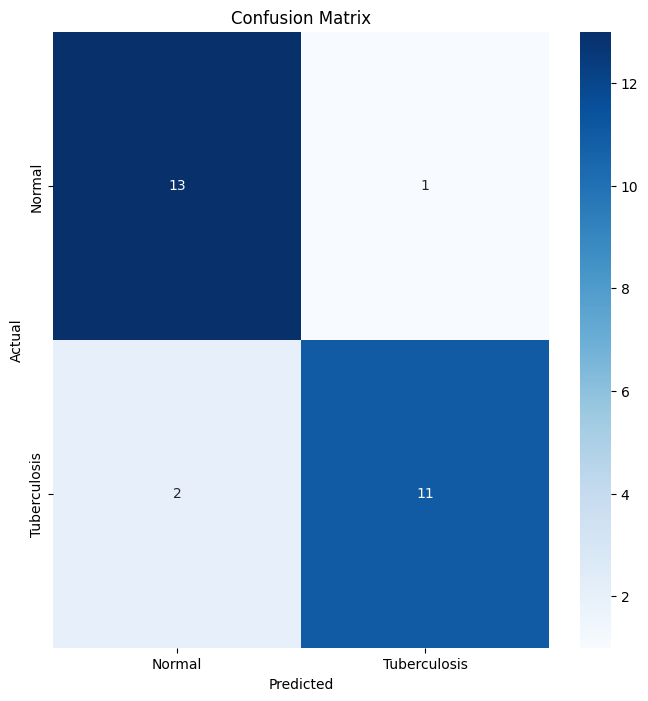

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels_A)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dataset_B = tf.keras.models.load_model('/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/code/models/S2.h5')

In [ ]:
dataset_B.compile(
    optimizer='Adam',  # Or the optimizer you used originally
    loss='binary_focal_crossentropy',  # Or your specific loss function
    metrics=['accuracy']  # This should be a flat list
)

In [ ]:
dataset_B.evaluate(val_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.5454 - loss: 0.9028


[0.7997638583183289, 0.5925925970077515]

In [ ]:
dataset_C = tf.keras.models.load_model('/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/code/models/T2.h5')

In [ ]:
dataset_C.compile(
    optimizer='Adam',  # Or the optimizer you used originally
    loss='binary_focal_crossentropy',  # Or your specific loss function
    metrics=['accuracy']  # This should be a flat list
)

In [ ]:
dataset_C.evaluate(val_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.5657 - loss: 33.8316


[35.751834869384766, 0.5185185074806213]

In [ ]:
dataset_A_B_C = tf.keras.models.load_model('/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/code/models/MST_.h5')

In [ ]:
dataset_A_B_C.compile(
    optimizer='Adam',  # Or the optimizer you used originally
    loss='binary_focal_crossentropy',  # Or your specific loss function
    metrics=['accuracy']  # This should be a flat list
)

In [ ]:
dataset_A_B_C.evaluate(val_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 1.0000 - loss: 0.0017


[0.0016855953726917505, 1.0]

**Testing on Dataset B (Shenzhen)**

In [ ]:
data_path_2 = '/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/data/ChinaSet'
batch_size = 8
image_size = (224, 224, 1)
#1 is the number of channels, everything is grayscale and everything is only one channel
seed = 42
epochs = 50
split_ratio = 0.20

In [ ]:
val_ds = get_tf_data(data_path_2, batch_size, image_size, seed, split_ratio)

Found 662 files belonging to 2 classes.
Using 530 files for training.
Found 662 files belonging to 2 classes.
Using 132 files for validation.


In [ ]:
dataset_A.evaluate(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 705ms/step - accuracy: 0.5259 - loss: 3.8724


[3.863003730773926, 0.5227272510528564]

In [ ]:
dataset_B.evaluate(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8681 - loss: 0.2611


[0.337625116109848, 0.7954545617103577]

In [ ]:
def convert_tf_ds_to_np(data_ds):
  images_2 = []
  labels_2 = []
  i = 0
  for images_batch_2, labels_batch_2 in data_ds.as_numpy_iterator():
    images_2.append(images_batch_2)
    labels_2.append(labels_batch_2)
    # i = i + 1
    # if i > 5:
    #   break
  images_2 = np.concatenate(images_2, axis=0)
  labels_2 = np.concatenate(labels_2, axis=0).astype(int)
  return images_2, labels_2

In [ ]:
images_2, true_labels = convert_tf_ds_to_np(val_ds)

In [ ]:
pred_labels_B = dataset_B.predict(images_2)
pred_labels_B = (pred_labels_B >= 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step


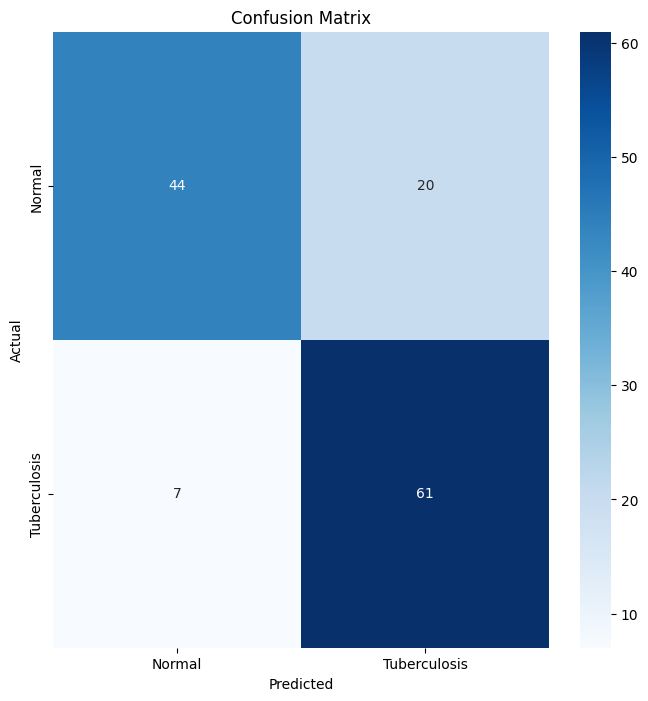

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels_B)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dataset_C.evaluate(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6909 - loss: 4.9546


[3.8548331260681152, 0.7348484992980957]

In [ ]:
dataset_A_B_C.evaluate(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9808 - loss: 0.0903


[0.1837589591741562, 0.9545454382896423]

**Testing on Dataset C (TB)**

In [ ]:
data_path_3 = '/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/data/TB_Chest_Radiography_Database'
batch_size = 8
image_size = (224, 224, 1)
#1 is the number of channels, everything is grayscale and everything is only one channel
seed = 42
epochs = 50
split_ratio = 0.2

In [ ]:
val_ds = get_tf_data(data_path_3, batch_size, image_size, seed, split_ratio)

Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


In [ ]:
dataset_A.evaluate(val_ds)

105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 495ms/step - accuracy: 0.2719 - loss: 4.4969


[4.484478950500488, 0.2809523940086365]

In [ ]:
dataset_B.evaluate(val_ds)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3910 - loss: 0.8657


[0.876533567905426, 0.37261903285980225]

In [ ]:
dataset_C.evaluate(val_ds)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9591 - loss: 0.0667


[0.06484311074018478, 0.9583333134651184]

In [ ]:
def convert_tf_ds_to_np(data_ds):
  images_3 = []
  labels_3 = []
  i = 0
  for images_batch_3, labels_batch_3 in data_ds.as_numpy_iterator():
    images_3.append(images_batch_3)
    labels_3.append(labels_batch_3)
    # i = i + 1
    # if i > 5:
    #   break
  images_3 = np.concatenate(images_3, axis=0)
  labels_3 = np.concatenate(labels_3, axis=0).astype(int)
  return images_3, labels_3

In [ ]:
images_3, true_labels = convert_tf_ds_to_np(val_ds)

In [ ]:
pred_labels_C = dataset_C.predict(images_3)
pred_labels_C = (pred_labels_C >= 0.5).astype(int)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


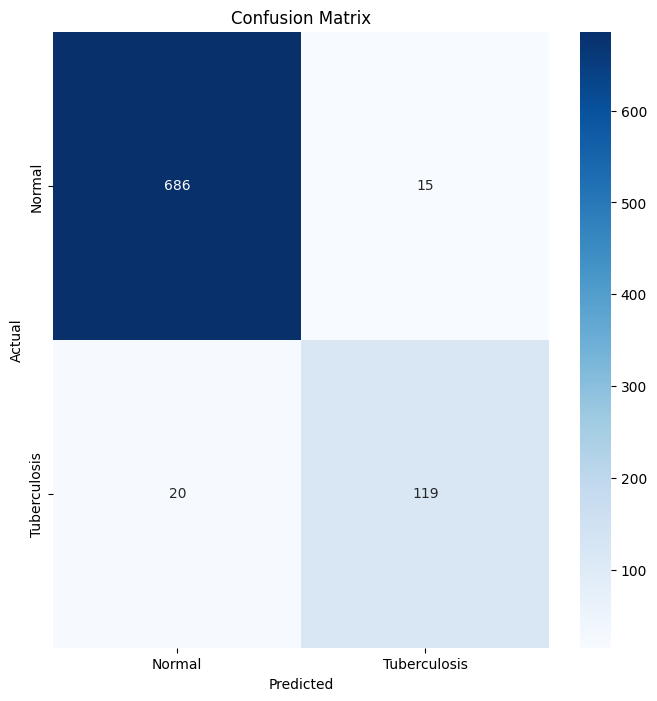

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels_C)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dataset_A_B_C.evaluate(val_ds)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9962 - loss: 0.0025


[0.0022865452338010073, 0.9976190328598022]

**Testing on Dataset A + B + C (Fully Combined)**

In [ ]:
data_path_4 = '/content/drive/MyDrive/Veritas AI/Veritas AI - Anusuiya/data/combined_MZT_all'
batch_size = 8
image_size = (224, 224, 1)
#1 is the number of channels, everything is grayscale and everything is only one channel
seed = 42
epochs = 50
split_ratio = 0.20

In [ ]:
val_ds = get_tf_data(data_path_4, batch_size, image_size, seed, split_ratio)

Found 5000 files belonging to 2 classes.
Using 4000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


In [ ]:
dataset_A.evaluate(val_ds)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3217 - loss: 4.3526


[4.250960350036621, 0.32600000500679016]

In [ ]:
dataset_B.evaluate(val_ds)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5098 - loss: 0.6558


[0.6756811738014221, 0.5049999952316284]

In [ ]:
dataset_C.evaluate(val_ds)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9544 - loss: 0.4805


[0.8894193172454834, 0.9509999752044678]

In [ ]:
dataset_A_B_C.evaluate(val_ds)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9789 - loss: 0.0556


[0.06283306330442429, 0.9779999852180481]

In [ ]:
def convert_tf_ds_to_np(data_ds):
  images_4 = []
  labels_4 = []
  i = 0
  for images_batch_4, labels_batch_4 in data_ds.as_numpy_iterator():
    images_4.append(images_batch_4)
    labels_4.append(labels_batch_4)
    # i = i + 1
    # if i > 5:
    #   break
  images_4 = np.concatenate(images_4, axis=0)
  labels_4 = np.concatenate(labels_4, axis=0).astype(int)
  return images_4, labels_4

In [ ]:
images_4, true_labels = convert_tf_ds_to_np(val_ds)

In [ ]:
pred_labels_A_B_C = dataset_A_B_C.predict(images_4)
pred_labels_A_B_C = (pred_labels_A_B_C >= 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


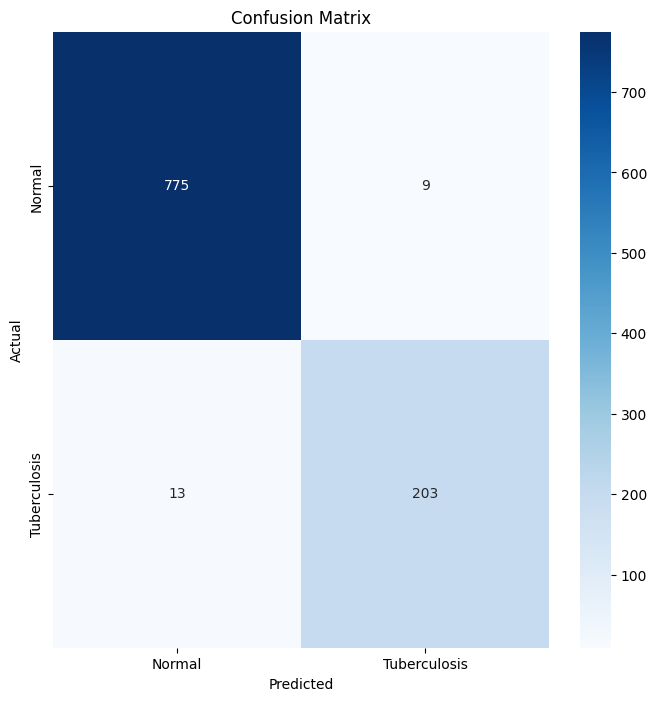

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels_A_B_C)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()